# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Barrie, Ontario, Canada**, or **Canada** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Barrie, Ontario, Canada** to Ann Arbor, USA. In that case at least one source file must be about **Barrie, Ontario, Canada**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Barrie, Ontario, Canada** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Barrie, Ontario Weather Phenomena

This assignment will look at the weather conditiond for Barrie Ontario Canada from the dataset "Global Historical Climatology Network - Daily ". Since the city of Barrie is known for a high level of rain, it will be compared the St. John's Newfoundland as it has on of the highest levels of percipication in Canada. 

# 1 Region and Domain
**State the region and the domain category that your data sets are about.**  
Barrie, Ontario, Canada  
Weather phenomena  

# 2 Research Question
You must state a question about the domain category and region that you identified as being
interesting.  
How does Barrie stack up when compared to cities in Canada with the highest and lowest level of precipitation?

# 3 Links
The data for this report comes from The National Centers for Environmental Information (NCEI).  
Barrie, Ontario data: https://www.ncei.noaa.gov/data/daily-summaries/access/CA006110556.csv   
St. John's, Newfoundland data: https://www.ncei.noaa.gov/data/daily-summaries/access/CA008403505.csv  
White Horse, Yukon data: https://www.ncei.noaa.gov/data/daily-summaries/access/CA002101303.csv

# 4 Image
**You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo’s principles of truthfulness, functionality,
beauty, and insightfulness.**

# 5 Discussion
**You must contribute a short (1-2 paragraph) written justification of how your visualization
addresses your stated research question.**  
The plot compares the level of precipitation for three separate cities in Canada. St John, Newfoundland represents one of the wettest cities in Canada, while White Horse, Yukon is one of the driest. The figure includes two plots that compare the three cities, but demonstrates it in different ways. The final plot is of the distribution for the city of Barrie itself. 

From the comparisons, it is clear that Barrie is just as wet of a city as St John, if not even wetter. There are very little similarities between Barrie and the very dry city of White Horse. The final plot also shows that even though Barrie is a very wet city, the distribution is weighted to zero, meaning that most days will have no precipitation.  

**Truthfulness:** The plots use the same the scale, so their values are accurately compared  
**Beauty:** The figure has simple look with the frames remove. Only the major ticks remain to give an impression to the reader, the exact values are not needed.   
**Functionality:** Each of the distributions are clearly labelled for easy identification. The colour scheme is colourblind friendly, making the comparison easier.   
**Insight fullness:** The box plot and violin plot give the strong impression that Barrie experiences an equal or greater level of precipitation than St John. It is also clear from the last plot that even as a wet city, the average day in Barrie is likely to be dry.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
%matplotlib notebook
#Load and subset the data
barrie = pd.read_csv('CA006110556.csv')
barrie = barrie[['DATE', 'PRCP']]
stjohn = pd.read_csv('CA008403505.csv')
stjohn = stjohn[['DATE', 'PRCP']]
whitehorse = pd.read_csv('CA002101303.csv')
whitehorse = whitehorse[['DATE', 'PRCP']]

#clean up date data
barrie['DATE'] = pd.to_datetime(barrie['DATE'])
stjohn['DATE'] = pd.to_datetime(stjohn['DATE'])
whitehorse['DATE'] = pd.to_datetime(whitehorse['DATE'])

#group by month
barrie['MONTH'] = barrie['DATE'].dt.month
stjohn['MONTH'] = stjohn['DATE'].dt.month
whitehorse['MONTH'] = whitehorse['DATE'].dt.month

#group by day
barrie['DAY'] = barrie['DATE'].dt.day
stjohn['DAY'] = stjohn['DATE'].dt.day
whitehorse['DAY'] = whitehorse['DATE'].dt.day

In [2]:
# summary data
sumbarrie = stjohn.groupby(['MONTH', 'DAY']).fillna(0)
sumstjohn = barrie.groupby(['MONTH', 'DAY']).fillna(0)
sumwhitehorse = whitehorse.groupby(['MONTH', 'DAY']).fillna(0)

<IPython.core.display.Javascript object>


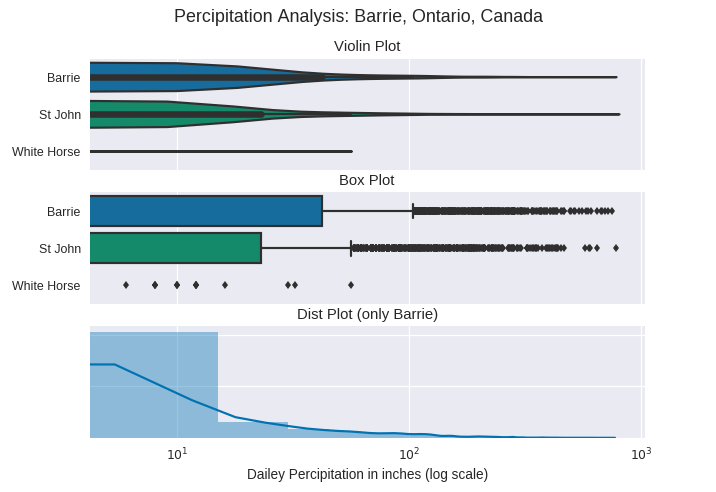

In [9]:
data =pd.DataFrame({'Barrie' : sumbarrie.PRCP, 'St John' : sumstjohn.PRCP, 'White Horse': sumwhitehorse.PRCP})
sns.set(palette="colorblind")
fig, ax = plt.subplots(3,1, sharex=True)
fig.suptitle('Percipitation Analysis: Barrie, Ontario, Canada')

sns.violinplot(data=data, ax=ax[0], scale = 'width',orient = 'h')
ax[0].set_title('Violin Plot')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')


sns.boxplot(data=data, ax=ax[1],orient = 'h')
ax[1].set_title('Box Plot')
sns.distplot(data['Barrie'], ax=ax[2])
ax[2].set_title('Dist Plot (only Barrie)')
plt.xscale('log')
plt.xlabel('Dailey Percipitation in inches (log scale)')

sns.despine(bottom = True, left = True)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.savefig('barrie.png')
plt.show()